In [1]:
#### Detecting fake news

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Reading the data
df_fn =pd.read_csv("news.csv")

# Get the shape and the first five rows

df_fn.shape
df_fn.head(5)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


(0.0, 20000.0)

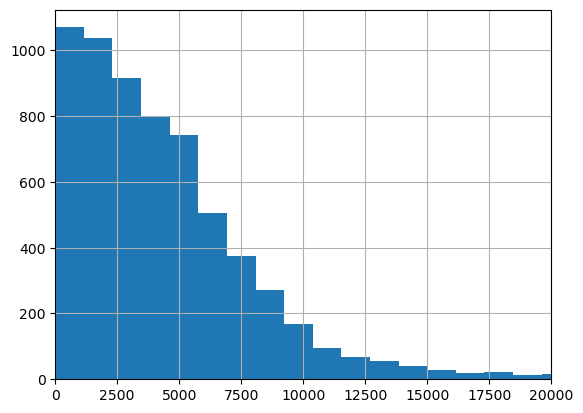

In [9]:
df_fn['text'].apply(lambda t: len(t)).hist(bins=100)
plt.xlim(0,20000)

In [10]:
# Getting the labels
labels = df_fn.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [11]:
#Splitting the dataset
x_train, x_test, y_train, y_test=train_test_split(df_fn['text'], labels, test_size=0.2, random_state=7)

In [15]:
x_train

6237    The head of a leading survivalist group has ma...
3722    ‹ › Arnaldo Rodgers is a trained and educated ...
5774    Patty Sanchez, 51, used to eat 13,000 calories...
336     But Benjamin Netanyahu’s reelection was regard...
3622    John Kasich was killing it with these Iowa vot...
                              ...                        
5699                                                     
2550    It’s not that Americans won’t elect wealthy pr...
537     Anyone writing sentences like ‘nevertheless fu...
1220    More Catholics are in Congress than ever befor...
4271    It was hosted by CNN, and the presentation was...
Name: text, Length: 5068, dtype: object

In [12]:
# Initializing a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [17]:
tfidf_train[0]

<1x61651 sparse matrix of type '<class 'numpy.float64'>'
	with 168 stored elements in Compressed Sparse Row format>

In [13]:
# Initializing a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

#Predicting on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


In [14]:
#Building confusion matrix
confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])

array([[591,  47],
       [ 43, 586]])

Interpretation: we have 590 true positives. 586  true negatives, 43 false positives and 48 false negatives.